## Challenge Set 1
##### Fernando Hidalgo

In [151]:
import requests
from bs4 import BeautifulSoup as bf
import pandas as pd
import numpy as np
import codecs
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
from selenium.webdriver.support.ui import Select
import seaborn as sns
import matplotlib.pyplot as plt
import wikipedia
import re
import csv
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
from collections import defaultdict


%matplotlib inline


## Challenge 1

In [433]:
files = ['turnstile_160625.txt',
             'turnstile_160618.txt',
             'turnstile_160702.txt'
             ]
rows = []

for file in files:
    with open(filename) as f:
        next(f)
        reader = csv.reader(f)
        rows_temp = [[cell.strip() for cell in row] for row in reader]

rows.extend(rows_temp)


In [434]:
raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))

## Challenge 2

In [435]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}

In [449]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

In [450]:
key = list(datetime_count_times.keys())[0]
print (key)
for i in range(5):
    print (datetime_count_times[key][i])

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
[datetime.datetime(2016, 6, 18, 1, 0), 72, datetime.timedelta(0, 14400)]
[datetime.datetime(2016, 6, 18, 5, 0), 359, datetime.timedelta(0, 14400)]
[datetime.datetime(2016, 6, 18, 9, 0), 302, datetime.timedelta(0, 14400)]
[datetime.datetime(2016, 6, 18, 13, 0), 249, datetime.timedelta(0, 14400)]
[datetime.datetime(2016, 6, 18, 17, 0), 214, datetime.timedelta(0, 14400)]


In [451]:
all_counts = [(datetime,count) for rows in datetime_count_times.values() for datetime, count, _ in rows]
print all_counts[-50:]

[(datetime.datetime(2016, 6, 16, 21, 0), 17), (datetime.datetime(2016, 6, 17, 1, 0), 0), (datetime.datetime(2016, 6, 17, 5, 0), 127), (datetime.datetime(2016, 6, 17, 9, 0), 166), (datetime.datetime(2016, 6, 17, 13, 0), 342), (datetime.datetime(2016, 6, 17, 17, 0), 595), (datetime.datetime(2016, 6, 17, 21, 0), 7230), (datetime.datetime(2016, 6, 25, 1, 0), 0), (datetime.datetime(2016, 6, 25, 5, 0), 16), (datetime.datetime(2016, 6, 25, 9, 0), 89), (datetime.datetime(2016, 6, 25, 13, 0), 93), (datetime.datetime(2016, 6, 25, 17, 0), 79), (datetime.datetime(2016, 6, 25, 21, 0), 25), (datetime.datetime(2016, 6, 26, 1, 0), 0), (datetime.datetime(2016, 6, 26, 5, 0), 18), (datetime.datetime(2016, 6, 26, 9, 0), 156), (datetime.datetime(2016, 6, 26, 13, 0), 145), (datetime.datetime(2016, 6, 26, 17, 0), 99), (datetime.datetime(2016, 6, 26, 21, 0), 16), (datetime.datetime(2016, 6, 27, 1, 0), 0), (datetime.datetime(2016, 6, 27, 5, 0), 184), (datetime.datetime(2016, 6, 27, 9, 0), 182), (datetime.datet

In [452]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}

In [453]:
all_good_counts = [count for rows in datetime_counts.values() for _, count in rows]
print len(all_good_counts) / float(len(all_counts))

0.979989065441


In [454]:
all_good_counts.sort()
print all_good_counts[-5:]

[4982, 4985, 4987, 4988, 4999]


In [455]:
print all_good_counts[:5]

[0, 0, 0, 0, 0]


## Challenge 3

In [456]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

In [497]:
turnstile = list(day_counts.keys())[10]
print (turnstile)
for i in range(5):
    print (day_counts[turnstile][i])

('N062', 'R011', '01-03-03', '42 ST-PORT AUTH')
(datetime.date(2016, 6, 11), 956)
(datetime.date(2016, 6, 12), 1044)
(datetime.date(2016, 6, 13), 2125)
(datetime.date(2016, 6, 14), 2112)
(datetime.date(2016, 6, 15), 2157)


## Challenge 4

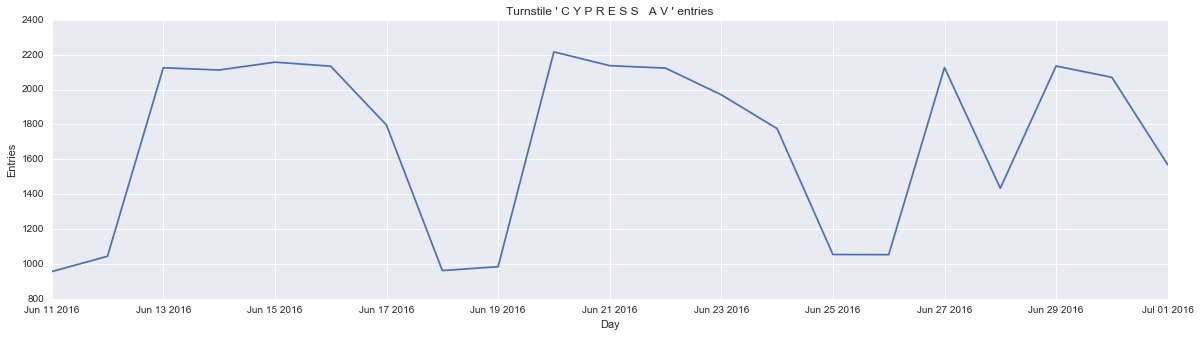

In [500]:
turnstile_data = day_counts[turnstile]
dates = [x[0] for x in turnstile_data]
counts = [x[1] for x in turnstile_data]
plt.figure(figsize=(20,5))
x = ' '
for i in range(len(key)):
    x +=  str(key[i]) + ' '
plt.title('Turnstile %r entries' %x)
plt.xlabel('Day')
plt.ylabel('Entries')
_ = plt.plot(dates,counts)

## Challenge 5

In [501]:
per_turnstile = defaultdict(list)
for turnstile, rows in datetime_counts.items():
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    per_turnstile[(turnstile[0],turnstile[1],turnstile[3])] = sorted(by_day.items())

In [503]:
key = list(per_turnstile.keys())[0]
print (key)
for i in range(5):
    print (per_turnstile[key][i])

('R137', 'R031', '34 ST-PENN STA')
(datetime.date(2016, 6, 11), 3424057)
(datetime.date(2016, 6, 12), 2863813)
(datetime.date(2016, 6, 13), 5760092)
(datetime.date(2016, 6, 14), 6034731)
(datetime.date(2016, 6, 15), 6162771)


In [504]:
len(groupby_turnstile.keys())

727

In [505]:
len(set(groupby_turnstile.keys()))

727

In [506]:
len(day_counts.items())

4593

## Challenger 6

In [507]:
datetime_counts.items()[0]

(('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'),
 [(datetime.datetime(2016, 6, 18, 1, 0), 72),
  (datetime.datetime(2016, 6, 18, 5, 0), 359),
  (datetime.datetime(2016, 6, 18, 9, 0), 302),
  (datetime.datetime(2016, 6, 18, 13, 0), 249),
  (datetime.datetime(2016, 6, 18, 17, 0), 214),
  (datetime.datetime(2016, 6, 18, 21, 0), 150),
  (datetime.datetime(2016, 6, 19, 1, 0), 38),
  (datetime.datetime(2016, 6, 19, 5, 0), 129),
  (datetime.datetime(2016, 6, 19, 9, 0), 173),
  (datetime.datetime(2016, 6, 19, 13, 0), 229),
  (datetime.datetime(2016, 6, 19, 17, 0), 240),
  (datetime.datetime(2016, 6, 19, 21, 0), 171),
  (datetime.datetime(2016, 6, 20, 1, 0), 100),
  (datetime.datetime(2016, 6, 20, 5, 0), 831),
  (datetime.datetime(2016, 6, 20, 9, 0), 263),
  (datetime.datetime(2016, 6, 20, 13, 0), 55),
  (datetime.datetime(2016, 6, 20, 14, 19, 20), 179),
  (datetime.datetime(2016, 6, 20, 17, 0), 206),
  (datetime.datetime(2016, 6, 20, 21, 0), 101),
  (datetime.datetime(2016, 6, 21, 1, 0), 38),
 

In [509]:
per_station = defaultdict(list)
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    per_station[(turnstile[3])] = sorted(by_day.items())

In [510]:
key = list(per_station.keys())[0]
print (key)
for i in range(5):
    print (per_station[key][i])

CYPRESS AV
(datetime.date(2016, 6, 11), 550)
(datetime.date(2016, 6, 12), 392)
(datetime.date(2016, 6, 13), 872)
(datetime.date(2016, 6, 14), 945)
(datetime.date(2016, 6, 15), 924)


## Challenge 7

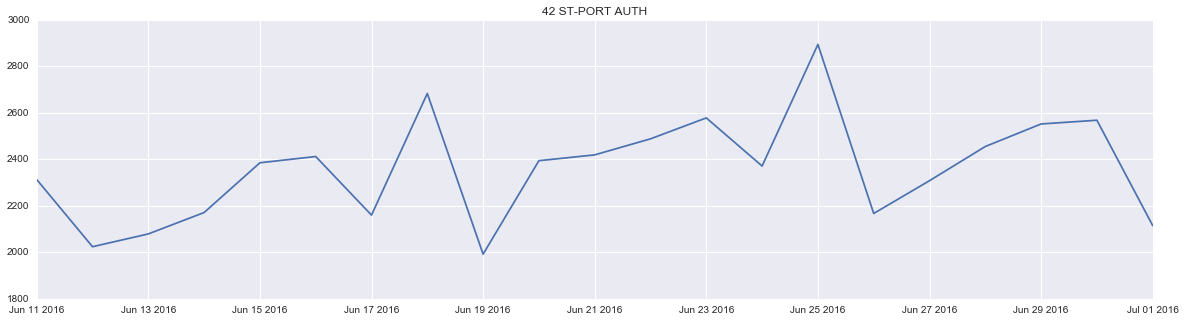

In [517]:
station = '42 ST-PORT AUTH'
data = groupby_station[station]
data = sorted(values)

dates = []
for i in values:
    dates.append(i[0])
    
entries = []
for i in values:
    entries.append(i[1])

plt.figure(figsize=(20,5))
plt.title(station)
_ = plt.plot(dates,entries)